In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV



In [5]:
data = pd.read_parquet("0000 (1).parquet")
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [6]:
data = data.drop(columns=["Unnamed: 0"])

In [7]:
data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

### Basic Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [9]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [10]:
data["artists"].nunique()

31437

In [11]:
data["artists"].unique()

array(['Gen Hoshino', 'Ben Woodward', 'Ingrid Michaelson;ZAYN', ...,
       'Cuencos Tibetanos Sonidos Relajantes',
       'Bryan & Katie Torwalt;Brock Human', 'Jesus Culture'], dtype=object)

In [13]:
data["album_name"].nunique()

46589

In [12]:
data["track_id"].nunique()

89741

In [14]:
data["track_name"].nunique()

73608

In [15]:
data["popularity"].nunique()

101

In [16]:
## Creating a dictionary with unique values as keys and their counts as values.
unique, counts = np.unique(data["popularity"], return_counts=True)
unique_counts = dict(zip(unique, counts))
print(unique_counts)

{np.int64(0): np.int64(16020), np.int64(1): np.int64(2140), np.int64(2): np.int64(1036), np.int64(3): np.int64(585), np.int64(4): np.int64(389), np.int64(5): np.int64(599), np.int64(6): np.int64(426), np.int64(7): np.int64(465), np.int64(8): np.int64(544), np.int64(9): np.int64(525), np.int64(10): np.int64(733), np.int64(11): np.int64(797), np.int64(12): np.int64(810), np.int64(13): np.int64(695), np.int64(14): np.int64(544), np.int64(15): np.int64(601), np.int64(16): np.int64(972), np.int64(17): np.int64(1119), np.int64(18): np.int64(1455), np.int64(19): np.int64(1612), np.int64(20): np.int64(2110), np.int64(21): np.int64(2344), np.int64(22): np.int64(2354), np.int64(23): np.int64(2117), np.int64(24): np.int64(1829), np.int64(25): np.int64(1603), np.int64(26): np.int64(1651), np.int64(27): np.int64(1518), np.int64(28): np.int64(1494), np.int64(29): np.int64(1400), np.int64(30): np.int64(1269), np.int64(31): np.int64(1202), np.int64(32): np.int64(1315), np.int64(33): np.int64(1309), np

#### In Popularity 0 indicates least or no popularity of the track and 100 indicates the most popular track. Here there are 16020 tracks with no popularity and 2 tracks with most popular or recently played tracks 

In [14]:
#no_popularity = data[data['popularity']==0]
#no_popularity

In [17]:
# Checking how many genres are there
data['track_genre'].nunique() 

114

In [18]:
 #True=1 and False=0
data["explicit"]=data["explicit"].astype(int)

In [19]:
data['explicit'].nunique() 

2

In [20]:
data['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
98         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

In [21]:
data['instrumentalness'].value_counts()

instrumentalness
0.000000    38763
0.000036      166
0.905000      122
0.895000      122
0.934000      121
            ...  
0.000065        1
0.000098        1
0.000071        1
0.000959        1
0.000072        1
Name: count, Length: 5346, dtype: int64

In [22]:
data['time_signature'].value_counts()

time_signature
4    101843
3      9195
5      1826
1       973
0       163
Name: count, dtype: int64

In [23]:
data['key'].value_counts()

key
7     13245
0     13061
2     11644
9     11313
1     10772
5      9368
11     9282
4      9008
6      7921
10     7456
8      7360
3      3570
Name: count, dtype: int64

In [24]:
data['explicit'].value_counts()

explicit
0    104253
1      9747
Name: count, dtype: int64

In [25]:
data['liveness'].value_counts()

liveness
0.1080    1353
0.1110    1318
0.1090    1198
0.1100    1179
0.1050    1114
          ... 
0.0163       1
0.0220       1
0.0162       1
0.0281       1
0.0118       1
Name: count, Length: 1722, dtype: int64

In [26]:
data['mode'].value_counts()

mode
1    72681
0    41319
Name: count, dtype: int64

In [27]:
# checking duplicate rows
data[data.duplicated()] 

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,0,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,0,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,0,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,0,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,0,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111246,0sSjIvTvd6fUSZZ5rnTPDW,Everything But The Girl,Eden (Deluxe Edition),Another Bridge - 2012 Remaster,26,132826,0,0.480,0.853,0,-6.276,1,0.0734,0.030600,0.000001,0.3200,0.775,85.181,4,trip-hop
111362,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152,0,0.622,0.816,6,-11.095,0,0.0483,0.009590,0.578000,0.0991,0.427,136.007,4,trip-hop
111980,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773,0,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112968,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,0,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish


In [28]:
data.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [29]:
missing_artists = data[data['artists'].isna()]
missing_artists

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,None,None,None,0,0,0,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [30]:
missing_album = data[data['album_name'].isna()]
missing_album

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,None,None,None,0,0,0,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [31]:
missing_track = data[data['track_name'].isna()]
missing_track

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,None,None,None,0,0,0,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


### Handling Missing Values

In [32]:
data.dropna(subset=["artists", "track_name", "album_name"], inplace=True)

In [33]:
data

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [34]:
data.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [35]:
# Dark boxes denote very high values
data.describe().style.background_gradient(cmap="magma") 

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,228031.153387,0.085501,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,107296.057716,0.279627,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8586.000000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,174066.000000,0.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,212906.000000,0.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,261506.000000,0.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5237295.000000,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


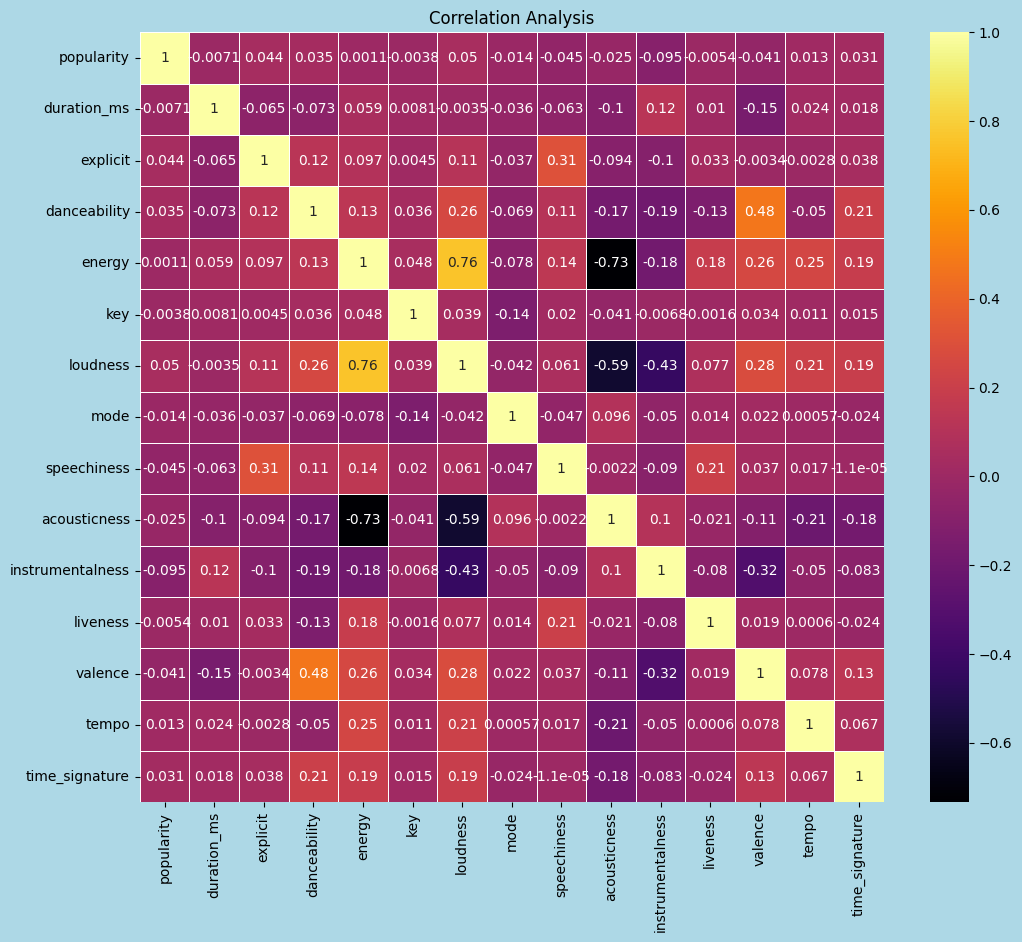

In [36]:
# Including numerical colmumns
corr_mat = data.select_dtypes(include=["int", "float"]).corr()

# Adjusting figure visuals
plt.figure(figsize=(12, 10), facecolor='#ADD8E6')
ax = plt.axes()
#ax.set_facecolor('#ADD8E6')
sns.heatmap(corr_mat, annot=True, cmap='inferno', linewidths=0.5 , annot_kws={"size": 10})
plt.title('Correlation Analysis')
plt.show()

In [37]:
num_cols = data[data.columns[(data.dtypes == 'float64') | (data.dtypes == 'int64')| (data.dtypes == 'int32')]]
num_cols.shape

(113999, 15)

In [38]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113999 non-null  int64  
 1   duration_ms       113999 non-null  int64  
 2   explicit          113999 non-null  int64  
 3   danceability      113999 non-null  float64
 4   energy            113999 non-null  float64
 5   key               113999 non-null  int64  
 6   loudness          113999 non-null  float64
 7   mode              113999 non-null  int64  
 8   speechiness       113999 non-null  float64
 9   acousticness      113999 non-null  float64
 10  instrumentalness  113999 non-null  float64
 11  liveness          113999 non-null  float64
 12  valence           113999 non-null  float64
 13  tempo             113999 non-null  float64
 14  time_signature    113999 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 13.9 MB


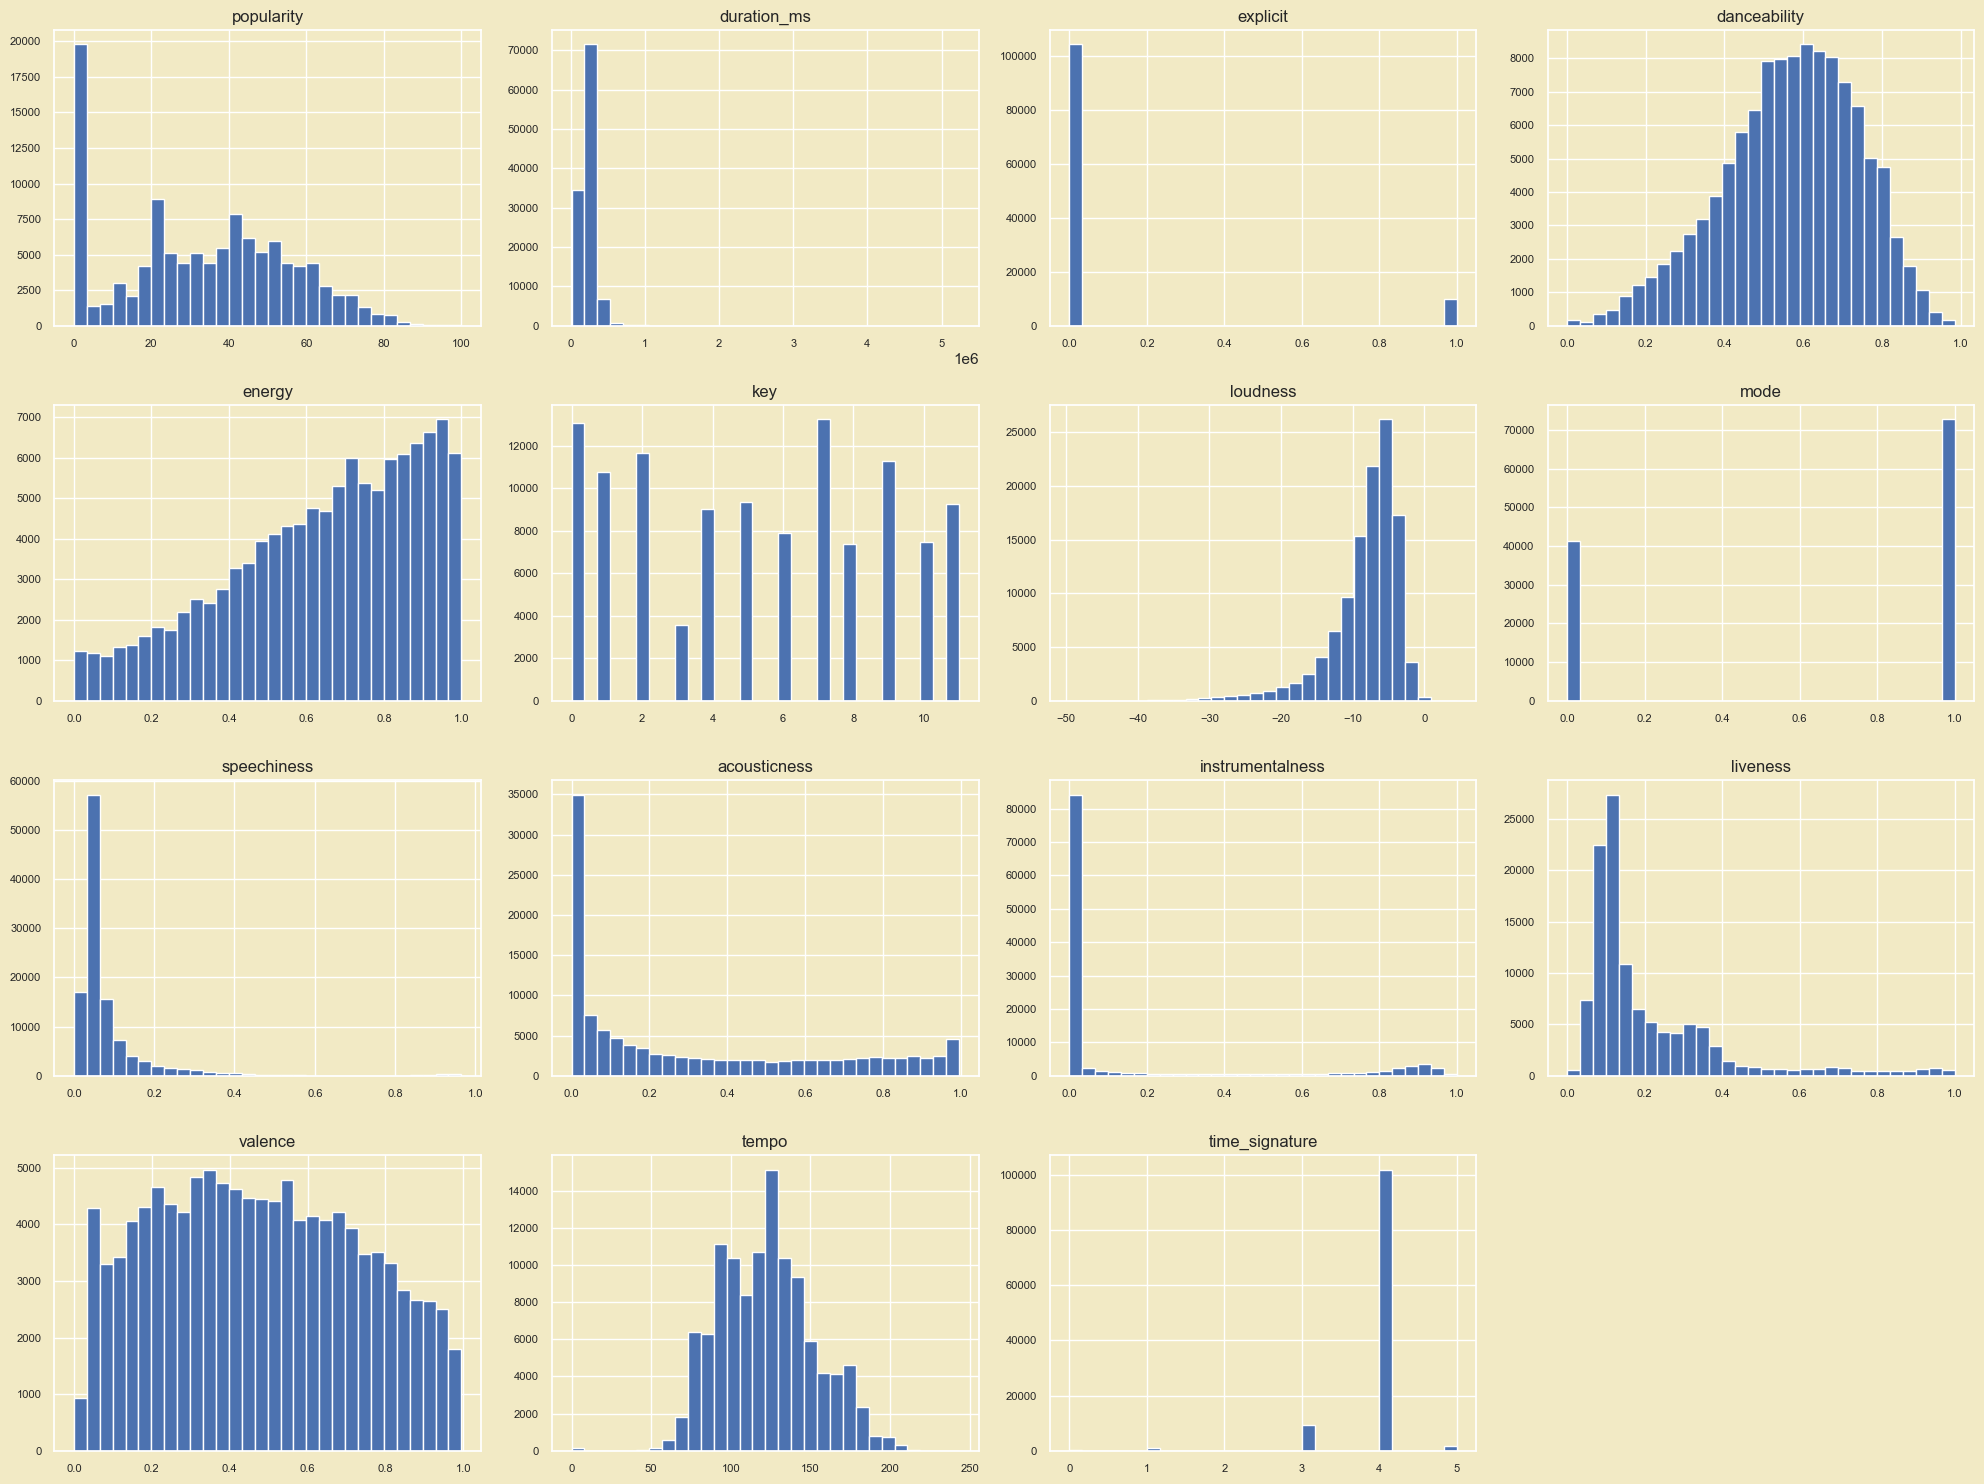

In [39]:
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
num_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

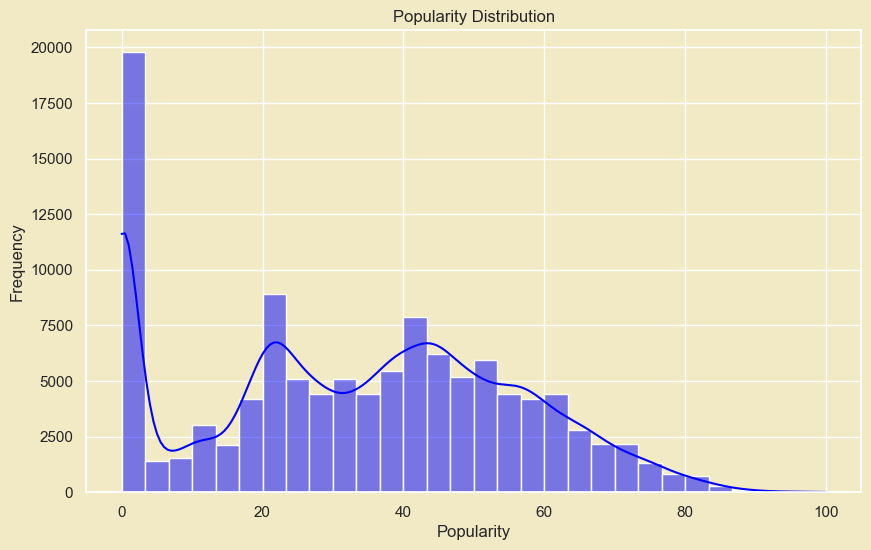

In [40]:
# Visualize distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=30, kde=True, color='blue')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')


In [41]:
# Select and scale the relevant features
features = data[['danceability','energy', 'loudness', 'valence', 'tempo']] # features selected by refering correlation matrix 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [42]:
data['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [43]:
# Genre to category mapping for playlist creation
genre_to_category = {
    # EDM
     
    'edm': 'Electronic Dance Music', 
    'house': 'Electronic Dance Music',
    'ambient': 'Electronic Dance Music',
    'chicago-house': 'Electronic Dance Music',
    'chill': 'Electronic Dance Music',
    'club': 'Electronic Dance Music',
    'electro': 'Electronic Dance Music',
    'electronic': 'Electronic Dance Music',
    'trance': 'Electronic Dance Music', 
    'techno': 'Electronic Dance Music',
    'dub': 'Electronic Dance Music',
    'dubstep': 'Electronic Dance Music', 
    'drum-and-bass': 'Electronic Dance Music', 
    'deep-house': 'Electronic Dance Music', 
    'detroit-techno': 'Electronic Dance Music', 
    'idm': 'Electronic Dance Music',
    'garbage': 'Electronic Dance Music',
    'minimal-techno': 'Electronic Dance Music', 
    'trip-hop': 'Electronic Dance Music',
    'progressive-house': 'Electronic Dance Music', 
    'breakbeat': 'Electronic Dance Music',
    
    # Rock
    
    'alt-rock': 'Rock & Metal', 
    'rock': 'Rock & Metal',
    'rockability': 'Rock & Metal',
    'alternative': 'Rock & Metal',
    'punk': 'Rock & Metal', 
    'punk-rock': 'Rock & Metal', 
    'hard-rock': 'Rock & Metal', 
    'psych-rock': 'Rock & Metal',
    'rock-n-roll': 'Rock & Metal',
    'emo': 'Rock & Metal',
    'metal': 'Rock & Metal', 
    'heavy-metal': 'Rock & Metal', 
    'black-metal': 'Rock & Metal', 
    'death-metal': 'Rock & Metal', 
    'grindcore': 'Rock & Metal',
    'hardcore': 'Rock & Metal',
    'metalcore': 'Rock & Metal',
    'grunge': 'Rock & Metal',
    
    
    # Hip-Hop and R&B
    
    'hip-hop': 'Hip-Hop and R&B', 
    'afrobeat': 'Hip-Hop and R&B',
    'dancehall': 'Hip-Hop and R&B',
    'reggaeton': 'Hip-Hop and R&B', 
    'reggae': 'Hip-Hop and R&B',
    'r-n-b': 'Hip-Hop and R&B', 
    'trap': 'Hip-Hop and R&B',
    
    # Pop
    
    'pop': 'Pop', 
    'electro-pop': 'Pop', 
    'synth-pop': 'Pop', 
    'indie-pop': 'Pop',
    'j-pop': 'Pop',
    'k-pop': 'Pop',
    'indie': 'Pop', 
    'indie-pop': 'Pop', 
    'pop-film': 'Pop', 
    'power-pop': 'Pop',
    'cantopop': 'Pop',
    'mandopop': 'Pop',
    
    # World Music
    
    'latin': 'World Music', 
    'brazil': 'World Music', 
    'salsa': 'World Music', 
    'samba': 'World Music', 
     
    'forro': 'World Music',
    'iranian': 'World Music',
    'latino': 'World Music',
    'malay': 'World Music',
    'mpb': 'World Music',
    'pagode': 'World Music',
    'sertanejo': 'World Music',
    'tango': 'World Music',
    'turkish': 'World Music',
    'world-music': 'World Music',
    
    # Funk and Disco
    
    'funk': 'Funk and Disco', 
    'disco': 'Funk and Disco', 
    'groove': 'Funk and Disco',
    
    # Country and Folk
    
    'bluegrass': 'Country & Folk', 
    'country': 'Country & Folk', 
    'folk': 'Country & Folk',
    'honk-tonk': 'Country & Folk',
    
    #Classical and Opera
    
    'classical': 'Classical & Opera', 
    'opera': 'Classical & Opera', 
    
     #Jazz and Blues
    
    'blues': 'Jazz & Blues', 
    'jazz': 'Jazz & Blues', 
    
}

# Map each track to a category
data['music_category'] = data['track_genre'].apply(lambda x: genre_to_category.get(x, 'Other'))

In [44]:
data.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,music_category
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.461,1,...,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic,Other
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.166,1,...,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic,Other


In [45]:
#music categories for different playlists
data['music_category'].unique() 

array(['Other', 'Hip-Hop and R&B', 'Rock & Metal',
       'Electronic Dance Music', 'Country & Folk', 'Jazz & Blues',
       'World Music', 'Pop', 'Classical & Opera', 'Funk and Disco'],
      dtype=object)

In [46]:
#Clustering songs in different playlists

kmeans = KMeans(n_clusters=10, random_state=42) 
data['cluster'] = kmeans.fit_predict(scaled_features)

In [47]:
#PCA for visualisation
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

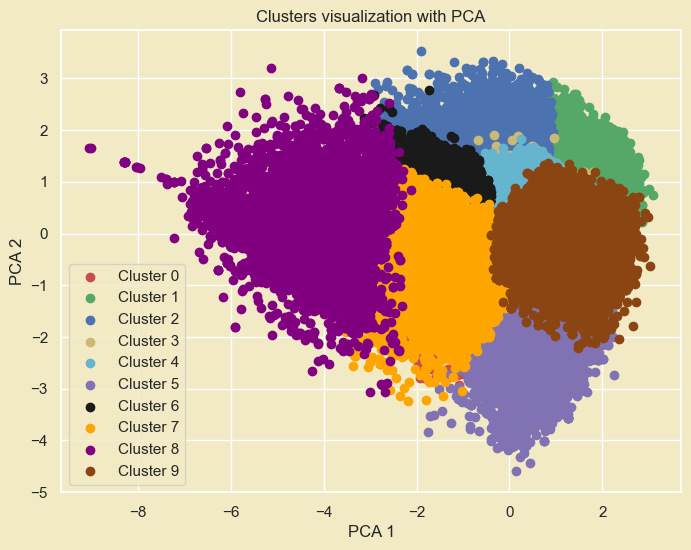

In [48]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k','#FFA500', '#800080','#8B4513' ]  # Colors for the clusters

# Plot each cluster
for i in range(10):
    
    idx = data['cluster'] == i
    plt.scatter(reduced_features[idx, 0], reduced_features[idx, 1], c=colors[i], label=f'Cluster {i}')

# Adjust visuals
plt.title('Clusters visualization with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
music_labels = ['Other', 'Hip-Hop and R&B', 'Rock & Metal',
       'Electronic Dance Music', 'Country & Folk', 'Jazz & Blues',
       'World Music', 'Pop', 'Classical & Opera', 'Funk and Disco']  
data['music_category'] = data['cluster'].apply(lambda x: music_labels[x])

In [50]:
data['music_category'].value_counts() # check clusters

music_category
Hip-Hop and R&B           17299
Country & Folk            15003
Electronic Dance Music    12679
Funk and Disco            12435
Rock & Metal              11766
Jazz & Blues              11680
Pop                        9666
World Music                9602
Other                      8211
Classical & Opera          5658
Name: count, dtype: int64

In [51]:
data['cluster'].value_counts()

cluster
1    17299
4    15003
3    12679
9    12435
2    11766
5    11680
7     9666
6     9602
0     8211
8     5658
Name: count, dtype: int64

In [52]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,music_category,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Rock & Metal,2
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,World Music,6
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,World Music,6
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Pop,7
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Country & Folk,4


In [53]:
#saving new file with added columns
data.to_csv('spotify_categories.csv', index=False)

In [54]:
categorical_cols = data.select_dtypes(include=["object"]).columns.to_list()
categorical_cols

['track_id',
 'artists',
 'album_name',
 'track_name',
 'track_genre',
 'music_category']

In [55]:
num_cols

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [56]:
# Select features and target variable
X = num_cols
y = data['music_category']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
import pickle
with open('std_scaler.pkl','wb') as f:
    pickle.dump(X_scaled,f)

with open('lbl_encoder.pkl','wb') as file:
    pickle.dump(y_encoded,file)

In [56]:

# Function to choose the best algorithm for classification
def best_ML_algorithm(x, y, algorithms):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)
    results = []
    for algorithm in algorithms:
        model = algorithm().fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        #Attempts to calculate the ROC-AUC score. If the algorithm doesn’t support it, returns 'N/A'.
        try:
            roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr', average='weighted')
        except AttributeError:
            roc_auc = 'N/A'
        results.append({
            "model": type(model).__name__,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC-AUC": roc_auc
        })
        
        print(f"{type(model).__name__} Train score: {model.score(x_train, y_train)}")
        print(f"{type(model).__name__}Test score: {model.score(x_test, y_test)}")
        
        # Classification Report
        print(f"{type(model).__name__} Classification Report:\n", classification_report(y_test, y_pred,target_names=label_encoder.classes_))

        # Confusion Matrix
        print(f"{type(model).__name__} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        #sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        #plt.ylabel('Actual')
        #plt.xlabel('Predicted')
        #plt.title(f'{type(model).__name__} Confusion Matrix')
        #plt.show()
        
    results_df = pd.DataFrame(results)
    return results_df

# List of classification algorithms to compare
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

algorithms = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, SVC, KNeighborsClassifier]

# Assuming scaled and y variables are defined
results_df = best_ML_algorithm(X, y, algorithms)
print(results_df)


LogisticRegression Train score: 0.9924911402472544
LogisticRegressionTest score: 0.9912280701754386
LogisticRegression Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.98      0.98      0.98      1397
        Country & Folk       0.99      0.99      0.99      3707
Electronic Dance Music       0.99      0.99      0.99      3141
        Funk and Disco       0.99      0.99      0.99      3066
       Hip-Hop and R&B       0.99      1.00      1.00      4354
          Jazz & Blues       0.99      1.00      1.00      2996
                 Other       0.99      0.99      0.99      2049
                   Pop       0.99      0.99      0.99      2413
          Rock & Metal       0.99      0.99      0.99      2967
           World Music       0.99      0.99      0.99      2410

              accuracy                           0.99     28500
             macro avg       0.99      0.99      0.99     28500
          weighted avg 

In [57]:
results_df

,model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,LogisticRegression,0.991228,0.991228,0.991228,0.991227,0.999951
1,DecisionTreeClassifier,0.942526,0.942515,0.942526,0.942511,0.967822
2,RandomForestClassifier,0.961965,0.961954,0.961965,0.961951,0.999327
3,GradientBoostingClassifier,0.963719,0.963745,0.963719,0.963718,0.999361
4,SVC,0.970035,0.970054,0.970035,0.970036,N/A
5,KNeighborsClassifier,0.835649,0.837084,0.835649,0.835714,0.977228


LogisticRegression Train score: 0.9924911402472544
LogisticRegression Test score: 0.9912280701754386
LogisticRegression Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.98      0.98      0.98      1397
        Country & Folk       0.99      0.99      0.99      3707
Electronic Dance Music       0.99      0.99      0.99      3141
        Funk and Disco       0.99      0.99      0.99      3066
       Hip-Hop and R&B       0.99      1.00      1.00      4354
          Jazz & Blues       0.99      1.00      1.00      2996
                 Other       0.99      0.99      0.99      2049
                   Pop       0.99      0.99      0.99      2413
          Rock & Metal       0.99      0.99      0.99      2967
           World Music       0.99      0.99      0.99      2410

              accuracy                           0.99     28500
             macro avg       0.99      0.99      0.99     28500
          weighted avg

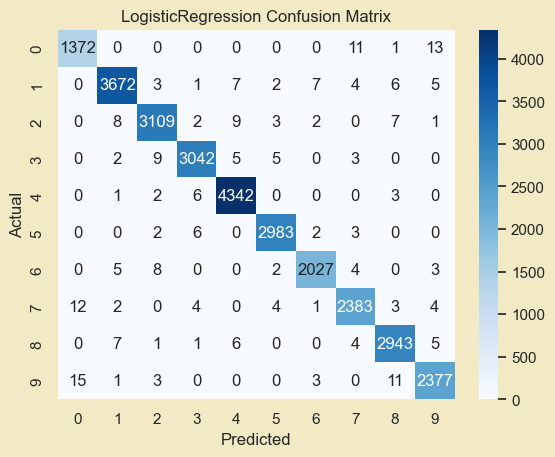

DecisionTreeClassifier Train score: 0.9434847191195219
DecisionTreeClassifier Test score: 0.9205263157894736
DecisionTreeClassifier Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.96      0.93      0.95      1397
        Country & Folk       0.89      0.90      0.89      3707
Electronic Dance Music       0.90      0.88      0.89      3141
        Funk and Disco       0.94      0.93      0.94      3066
       Hip-Hop and R&B       0.94      0.96      0.95      4354
          Jazz & Blues       0.95      0.94      0.94      2996
                 Other       0.89      0.93      0.91      2049
                   Pop       0.90      0.92      0.91      2413
          Rock & Metal       0.91      0.89      0.90      2967
           World Music       0.92      0.92      0.92      2410

              accuracy                           0.92     28500
             macro avg       0.92      0.92      0.92     28500
          

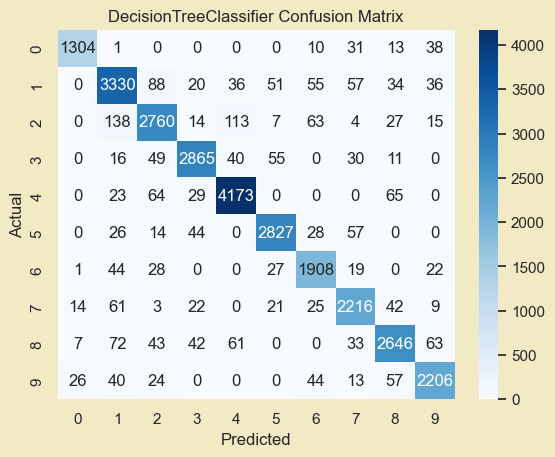

RandomForestClassifier Train score: 0.9991929730172283
RandomForestClassifier Test score: 0.9611929824561404
RandomForestClassifier Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.97      0.97      0.97      1397
        Country & Folk       0.96      0.96      0.96      3707
Electronic Dance Music       0.95      0.94      0.95      3141
        Funk and Disco       0.96      0.97      0.97      3066
       Hip-Hop and R&B       0.97      0.97      0.97      4354
          Jazz & Blues       0.97      0.97      0.97      2996
                 Other       0.95      0.96      0.95      2049
                   Pop       0.96      0.96      0.96      2413
          Rock & Metal       0.95      0.95      0.95      2967
           World Music       0.96      0.96      0.96      2410

              accuracy                           0.96     28500
             macro avg       0.96      0.96      0.96     28500
          

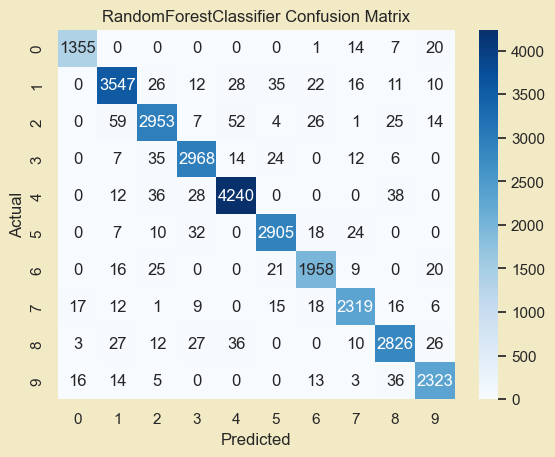

GradientBoostingClassifier Train score: 0.9762102480730769
GradientBoostingClassifier Test score: 0.9636842105263158
GradientBoostingClassifier Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.98      0.97      0.97      1397
        Country & Folk       0.96      0.96      0.96      3707
Electronic Dance Music       0.95      0.95      0.95      3141
        Funk and Disco       0.96      0.97      0.97      3066
       Hip-Hop and R&B       0.98      0.98      0.98      4354
          Jazz & Blues       0.97      0.97      0.97      2996
                 Other       0.96      0.95      0.96      2049
                   Pop       0.97      0.95      0.96      2413
          Rock & Metal       0.95      0.96      0.95      2967
           World Music       0.96      0.97      0.96      2410

              accuracy                           0.96     28500
             macro avg       0.96      0.96      0.96     2850

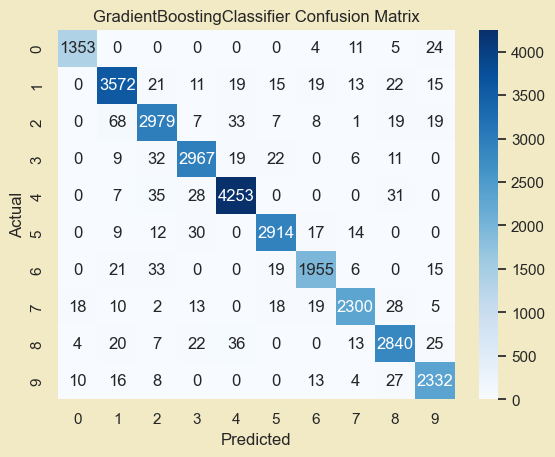

SVC Train score: 0.9841050772523655
SVC Test score: 0.9700350877192983
SVC Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.97      0.98      0.97      1397
        Country & Folk       0.96      0.97      0.97      3707
Electronic Dance Music       0.96      0.96      0.96      3141
        Funk and Disco       0.98      0.97      0.98      3066
       Hip-Hop and R&B       0.98      0.98      0.98      4354
          Jazz & Blues       0.98      0.98      0.98      2996
                 Other       0.96      0.96      0.96      2049
                   Pop       0.96      0.97      0.96      2413
          Rock & Metal       0.97      0.97      0.97      2967
           World Music       0.97      0.96      0.96      2410

              accuracy                           0.97     28500
             macro avg       0.97      0.97      0.97     28500
          weighted avg       0.97      0.97      0.97     28500

SV

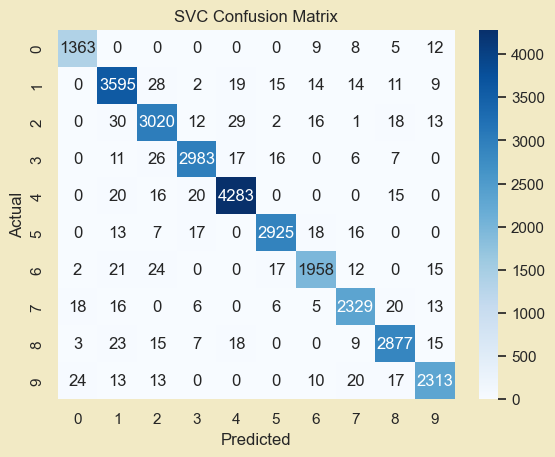

KNeighborsClassifier Train score: 0.8770161054515258
KNeighborsClassifier Test score: 0.8458947368421053
KNeighborsClassifier Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.90      0.90      0.90      1397
        Country & Folk       0.78      0.86      0.82      3707
Electronic Dance Music       0.79      0.82      0.80      3141
        Funk and Disco       0.88      0.84      0.86      3066
       Hip-Hop and R&B       0.86      0.91      0.88      4354
          Jazz & Blues       0.87      0.89      0.88      2996
                 Other       0.85      0.77      0.81      2049
                   Pop       0.85      0.82      0.83      2413
          Rock & Metal       0.86      0.80      0.83      2967
           World Music       0.87      0.81      0.84      2410

              accuracy                           0.85     28500
             macro avg       0.85      0.84      0.85     28500
          weight

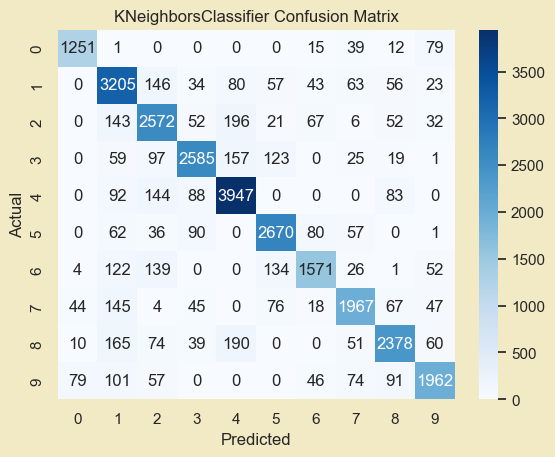

                        model  Accuracy  Precision    Recall  F1 Score  \
0          LogisticRegression  0.991228   0.991228  0.991228  0.991227   
1      DecisionTreeClassifier  0.920526   0.920664  0.920526  0.920506   
2      RandomForestClassifier  0.961193   0.961177  0.961193  0.961179   
3  GradientBoostingClassifier  0.963684   0.963711  0.963684  0.963683   
4                         SVC  0.970035   0.970054  0.970035  0.970036   
5        KNeighborsClassifier  0.845895   0.847331  0.845895  0.845776   

    ROC-AUC  
0  0.999951  
1  0.987547  
2   0.99927  
3   0.99936  
4       N/A  
5   0.98803  


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Function to choose the best algorithm for classification
def best_ML_algorithm(x, y, algorithms_with_params):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)
    results = []
    for algorithm, params in algorithms_with_params.items():
        model = algorithm(**params).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        # Attempts to calculate the ROC-AUC score. If the algorithm doesn’t support it, returns 'N/A'.
        try:
            roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr', average='weighted')
        except AttributeError:
            roc_auc = 'N/A'
        results.append({
            "model": type(model).__name__,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC-AUC": roc_auc
        })

        print(f"{type(model).__name__} Train score: {model.score(x_train, y_train)}")
        print(f"{type(model).__name__} Test score: {model.score(x_test, y_test)}")

        # Classification Report
        print(f"{type(model).__name__} Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

        # Confusion Matrix
        print(f"{type(model).__name__} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title(f'{type(model).__name__} Confusion Matrix')
        plt.show()

    results_df = pd.DataFrame(results)
    return results_df

# List of classification algorithms with specific hyperparameters to compare
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

algorithms_with_params = {
    LogisticRegression: {},
    DecisionTreeClassifier: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2},
    RandomForestClassifier: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
    GradientBoostingClassifier: {},
    SVC: {},
    KNeighborsClassifier: {'n_neighbors': 15}
}

# Assuming X and y variables are defined
results_df1 = best_ML_algorithm(X, y, algorithms_with_params)
print(results_df1)


In [3]:
results_df1

NameError: name 'results_df1' is not defined

LogisticRegression Train score: 0.997906408262085
LogisticRegression Test score: 0.9967719298245614
LogisticRegression Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.99      1.00      0.99      1397
        Country & Folk       1.00      1.00      1.00      3707
Electronic Dance Music       1.00      1.00      1.00      3141
        Funk and Disco       1.00      1.00      1.00      3066
       Hip-Hop and R&B       1.00      1.00      1.00      4354
          Jazz & Blues       1.00      1.00      1.00      2996
                 Other       1.00      1.00      1.00      2049
                   Pop       1.00      1.00      1.00      2413
          Rock & Metal       1.00      1.00      1.00      2967
           World Music       1.00      1.00      1.00      2410

              accuracy                           1.00     28500
             macro avg       1.00      1.00      1.00     28500
          weighted avg 

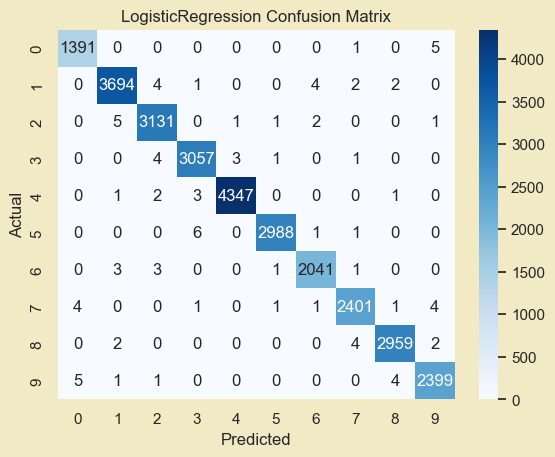

DecisionTreeClassifier Train score: 0.9998362553947999
DecisionTreeClassifier Test score: 0.9424912280701755
DecisionTreeClassifier Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.96      0.95      0.96      1397
        Country & Folk       0.93      0.93      0.93      3707
Electronic Dance Music       0.93      0.92      0.93      3141
        Funk and Disco       0.95      0.95      0.95      3066
       Hip-Hop and R&B       0.96      0.97      0.97      4354
          Jazz & Blues       0.95      0.96      0.96      2996
                 Other       0.95      0.94      0.95      2049
                   Pop       0.93      0.93      0.93      2413
          Rock & Metal       0.92      0.92      0.92      2967
           World Music       0.94      0.94      0.94      2410

              accuracy                           0.94     28500
             macro avg       0.94      0.94      0.94     28500
          

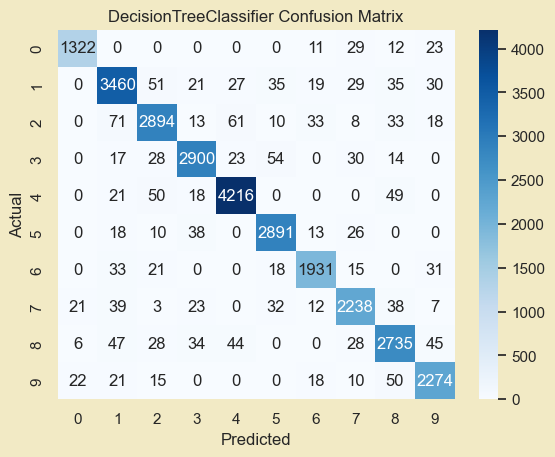

RandomForestClassifier Train score: 1.0
RandomForestClassifier Test score: 0.9636491228070175
RandomForestClassifier Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.97      0.97      0.97      1397
        Country & Folk       0.96      0.96      0.96      3707
Electronic Dance Music       0.95      0.95      0.95      3141
        Funk and Disco       0.97      0.97      0.97      3066
       Hip-Hop and R&B       0.97      0.98      0.98      4354
          Jazz & Blues       0.97      0.97      0.97      2996
                 Other       0.95      0.96      0.96      2049
                   Pop       0.97      0.96      0.96      2413
          Rock & Metal       0.96      0.96      0.96      2967
           World Music       0.96      0.96      0.96      2410

              accuracy                           0.96     28500
             macro avg       0.96      0.96      0.96     28500
          weighted avg   

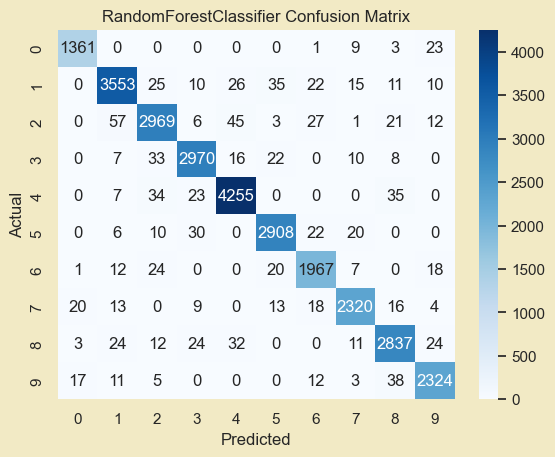

GradientBoostingClassifier Train score: 0.9974268704897133
GradientBoostingClassifier Test score: 0.9794736842105263
GradientBoostingClassifier Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.98      0.98      0.98      1397
        Country & Folk       0.97      0.97      0.97      3707
Electronic Dance Music       0.98      0.97      0.97      3141
        Funk and Disco       0.98      0.98      0.98      3066
       Hip-Hop and R&B       0.99      0.99      0.99      4354
          Jazz & Blues       0.98      0.99      0.99      2996
                 Other       0.98      0.98      0.98      2049
                   Pop       0.98      0.98      0.98      2413
          Rock & Metal       0.97      0.97      0.97      2967
           World Music       0.98      0.97      0.98      2410

              accuracy                           0.98     28500
             macro avg       0.98      0.98      0.98     2850

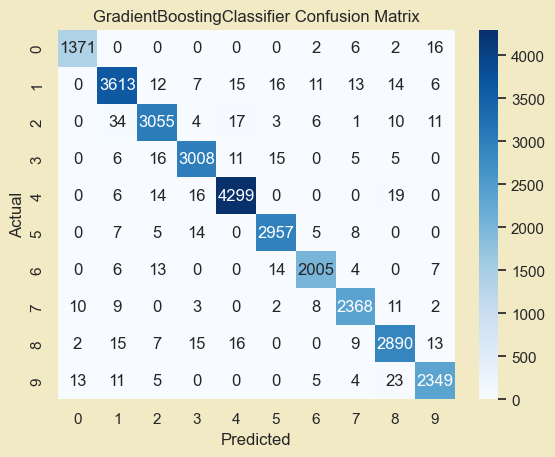

SVC Train score: 0.9978713201323992
SVC Test score: 0.996
SVC Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.99      0.99      0.99      1397
        Country & Folk       1.00      1.00      1.00      3707
Electronic Dance Music       0.99      1.00      0.99      3141
        Funk and Disco       1.00      1.00      1.00      3066
       Hip-Hop and R&B       1.00      1.00      1.00      4354
          Jazz & Blues       1.00      1.00      1.00      2996
                 Other       1.00      0.99      1.00      2049
                   Pop       0.99      0.99      0.99      2413
          Rock & Metal       1.00      1.00      1.00      2967
           World Music       0.99      0.99      0.99      2410

              accuracy                           1.00     28500
             macro avg       1.00      1.00      1.00     28500
          weighted avg       1.00      1.00      1.00     28500

SVC Confusion M

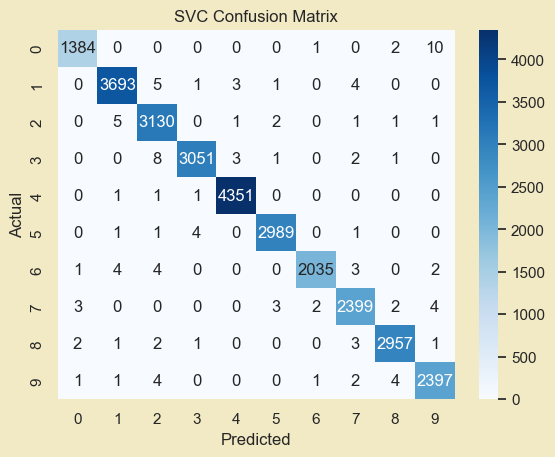

KNeighborsClassifier Train score: 1.0
KNeighborsClassifier Test score: 0.8892631578947369
KNeighborsClassifier Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.93      0.91      0.92      1397
        Country & Folk       0.86      0.90      0.88      3707
Electronic Dance Music       0.86      0.87      0.86      3141
        Funk and Disco       0.92      0.88      0.90      3066
       Hip-Hop and R&B       0.89      0.94      0.92      4354
          Jazz & Blues       0.90      0.92      0.91      2996
                 Other       0.88      0.84      0.86      2049
                   Pop       0.89      0.87      0.88      2413
          Rock & Metal       0.89      0.87      0.88      2967
           World Music       0.89      0.87      0.88      2410

              accuracy                           0.89     28500
             macro avg       0.89      0.89      0.89     28500
          weighted avg       0.

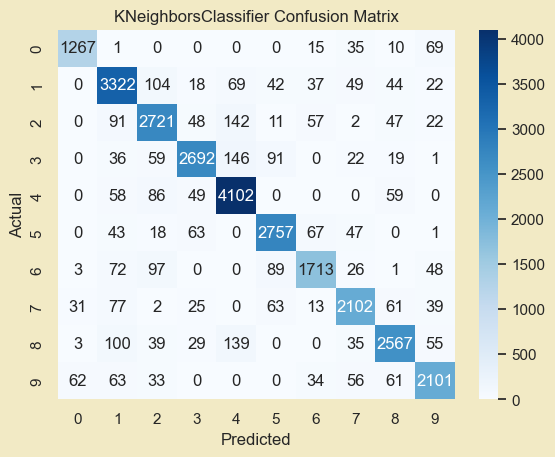

                        model  Accuracy  Precision    Recall  F1 Score  \
0          LogisticRegression  0.996772   0.996773  0.996772  0.996772   
1      DecisionTreeClassifier  0.942491   0.942493  0.942491  0.942474   
2      RandomForestClassifier  0.963649   0.963642  0.963649  0.963639   
3  GradientBoostingClassifier  0.979474   0.979472  0.979474  0.979471   
4                         SVC  0.996000   0.996003  0.996000  0.996000   
5        KNeighborsClassifier  0.889263   0.889586  0.889263  0.889113   

    ROC-AUC  
0  0.999996  
1  0.967789  
2  0.999384  
3  0.999792  
4       N/A  
5  0.993813  


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Function to choose the best algorithm for classification with GridSearchCV
def best_ML_algorithm(x, y, algorithms_with_params):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)
    results = []
    for algorithm, param_grid in algorithms_with_params.items():
        grid_search = GridSearchCV(algorithm(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(x_train, y_train)
        model = grid_search.best_estimator_
        
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        try:
            roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr', average='weighted')
        except AttributeError:
            roc_auc = 'N/A'
        
        results.append({
            "model": type(model).__name__,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC-AUC": roc_auc
        })

        print(f"{type(model).__name__} Train score: {model.score(x_train, y_train)}")
        print(f"{type(model).__name__} Test score: {model.score(x_test, y_test)}")

        # Classification Report
        print(f"{type(model).__name__} Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

        # Confusion Matrix
        print(f"{type(model).__name__} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title(f'{type(model).__name__} Confusion Matrix')
        plt.show()

    results_df = pd.DataFrame(results)
    return results_df

# List of classification algorithms with specific hyperparameters to compare using GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

algorithms_with_params = {
    LogisticRegression: {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'saga']
    },
    DecisionTreeClassifier: {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    RandomForestClassifier: {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    GradientBoostingClassifier: {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    SVC: {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    KNeighborsClassifier: {
        'n_neighbors': [5, 10, 15, 20],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

# Assuming X and y variables are defined 
  
    
results_df2 = best_ML_algorithm(X, y, algorithms_with_params)
print(results_df2)


In [1]:
results_df2

NameError: name 'results_df2' is not defined

LogisticRegression Train score: 0.997906408262085
LogisticRegression Test score: 0.9967719298245614
LogisticRegression Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.99      1.00      0.99      1397
        Country & Folk       1.00      1.00      1.00      3707
Electronic Dance Music       1.00      1.00      1.00      3141
        Funk and Disco       1.00      1.00      1.00      3066
       Hip-Hop and R&B       1.00      1.00      1.00      4354
          Jazz & Blues       1.00      1.00      1.00      2996
                 Other       1.00      1.00      1.00      2049
                   Pop       1.00      1.00      1.00      2413
          Rock & Metal       1.00      1.00      1.00      2967
           World Music       1.00      1.00      1.00      2410

              accuracy                           1.00     28500
             macro avg       1.00      1.00      1.00     28500
          weighted avg 

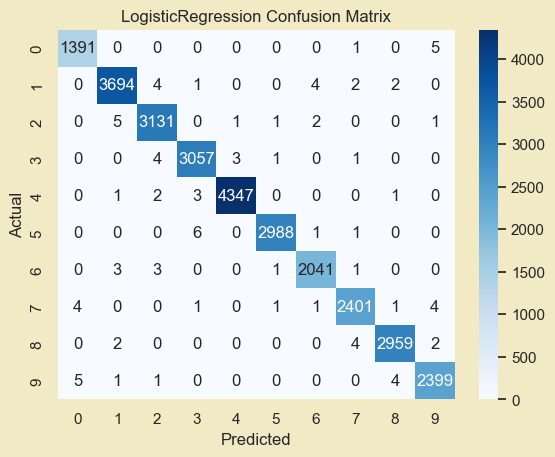

DecisionTreeClassifier Train score: 0.9998362553947999
DecisionTreeClassifier Test score: 0.9424210526315789
DecisionTreeClassifier Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.96      0.94      0.95      1397
        Country & Folk       0.93      0.93      0.93      3707
Electronic Dance Music       0.93      0.92      0.93      3141
        Funk and Disco       0.95      0.95      0.95      3066
       Hip-Hop and R&B       0.97      0.97      0.97      4354
          Jazz & Blues       0.95      0.97      0.96      2996
                 Other       0.94      0.94      0.94      2049
                   Pop       0.93      0.92      0.93      2413
          Rock & Metal       0.93      0.92      0.93      2967
           World Music       0.93      0.94      0.94      2410

              accuracy                           0.94     28500
             macro avg       0.94      0.94      0.94     28500
          

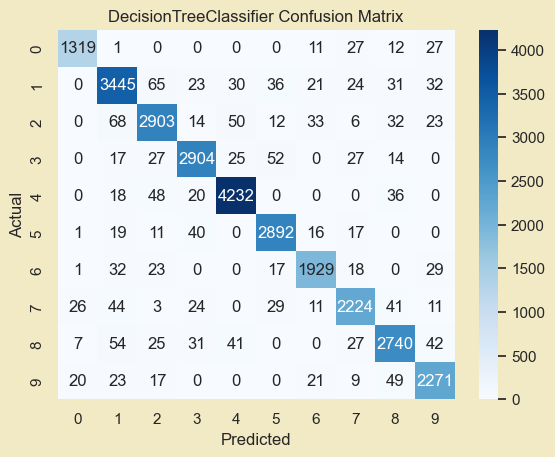

d:\MDE94\FinalProject\env\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "d:\MDE94\FinalProject\env\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\MDE94\FinalProject\env\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\MDE94\FinalProject\env\lib\site-packages\sklearn\ensemble\_forest.py", line 489, in fit
    trees = Parallel(
  File "d:\MDE94\FinalProject\env\lib\site-pac

RandomForestClassifier Train score: 1.0
RandomForestClassifier Test score: 0.9632982456140351
RandomForestClassifier Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       0.98      0.97      0.97      1397
        Country & Folk       0.96      0.96      0.96      3707
Electronic Dance Music       0.95      0.94      0.95      3141
        Funk and Disco       0.97      0.97      0.97      3066
       Hip-Hop and R&B       0.97      0.98      0.97      4354
          Jazz & Blues       0.97      0.97      0.97      2996
                 Other       0.95      0.96      0.95      2049
                   Pop       0.97      0.96      0.96      2413
          Rock & Metal       0.96      0.96      0.96      2967
           World Music       0.96      0.97      0.97      2410

              accuracy                           0.96     28500
             macro avg       0.96      0.96      0.96     28500
          weighted avg   

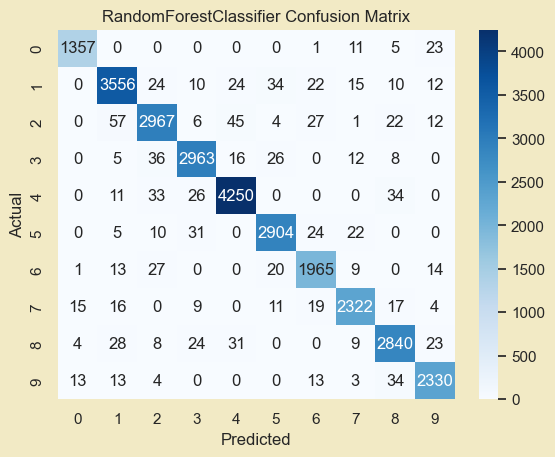

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Function to choose the best algorithm for classification with GridSearchCV and Stratified K-Fold
def best_ML_algorithm(x, y, algorithms_with_params):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    results = []

    for algorithm, param_grid in algorithms_with_params.items():
        grid_search = GridSearchCV(algorithm(), param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
        grid_search.fit(x_train, y_train)
        model = grid_search.best_estimator_

        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Attempts to calculate the ROC-AUC score. If the algorithm doesn’t support it, returns 'N/A'.
        try:
            roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr', average='weighted')
        except AttributeError:
            roc_auc = 'N/A'

        results.append({
            "model": type(model).__name__,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC-AUC": roc_auc
        })

        print(f"{type(model).__name__} Train score: {model.score(x_train, y_train)}")
        print(f"{type(model).__name__} Test score: {model.score(x_test, y_test)}")

        # Classification Report
        print(f"{type(model).__name__} Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

        # Confusion Matrix
        print(f"{type(model).__name__} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title(f'{type(model).__name__} Confusion Matrix')
        plt.show()

    results_df = pd.DataFrame(results)
    return results_df

# List of classification algorithms with specific hyperparameters to compare using GridSearchCV and Stratified K-Fold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

algorithms_with_params = {
    LogisticRegression: {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'saga']
    },
    DecisionTreeClassifier: {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    RandomForestClassifier: {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    GradientBoostingClassifier: {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    SVC: {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    KNeighborsClassifier: {
        'n_neighbors': [5, 10, 15, 20],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

# Assuming X and y variables are defined
results_df3= best_ML_algorithm(X, y, algorithms_with_params)
print(results_df3)


In [56]:
results_df3

,model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,LogisticRegression,0.996772,0.996773,0.996772,0.996772,0.999996
1,DecisionTreeClassifier,0.941754,0.941752,0.941754,0.941738,0.967382
2,RandomForestClassifier,0.963719,0.963712,0.963719,0.963708,0.99937
3,GradientBoostingClassifier,0.978807,0.978810,0.978807,0.978807,0.999806
4,SVC,0.996000,0.996003,0.996000,0.996000,N/A
5,KNeighborsClassifier,0.889263,0.889586,0.889263,0.889113,0.993813


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Define parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'loss': ['log_loss', 'exponential']
    #'loss': ['huber', 'deviance']
}

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)
# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y_encoded)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


d:\MDE94\capstoneprojects\.venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "d:\MDE94\capstoneprojects\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\MDE94\capstoneprojects\.venv\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\MDE94\capstoneprojects\.venv\lib\site-packages\sklearn\ensemble\_gb.py", line 673, in fit
    self._loss = self._get_loss(sample_weigh

Best Model Accuracy: 0.9999649122807017
Classification Report:
                         precision    recall  f1-score   support

     Classical & Opera       1.00      1.00      1.00      1397
        Country & Folk       1.00      1.00      1.00      3707
Electronic Dance Music       1.00      1.00      1.00      3141
        Funk and Disco       1.00      1.00      1.00      3066
       Hip-Hop and R&B       1.00      1.00      1.00      4354
          Jazz & Blues       1.00      1.00      1.00      2996
                 Other       1.00      1.00      1.00      2049
                   Pop       1.00      1.00      1.00      2413
          Rock & Metal       1.00      1.00      1.00      2967
           World Music       1.00      1.00      1.00      2410

              accuracy                           1.00     28500
             macro avg       1.00      1.00      1.00     28500
          weighted avg       1.00      1.00      1.00     28500



In [59]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'loss': ['log_loss']
    #'loss': ['huber', 'deviance']
}
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)

In [60]:

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), 
                           param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y_encoded)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'loss': ['log_loss'], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [61]:
grid_search.best_params_,grid_search.best_score_

({'learning_rate': 0.1,
  'loss': 'log_loss',
  'max_depth': 5,
  'n_estimators': 300},
 np.float64(0.9811489627507516))

In [68]:
# final model fit and prediction
final_model=GradientBoostingClassifier(n_estimators=300,loss='log_loss',max_depth=5,learning_rate=0.1,
                                       random_state=42)

final_model.fit(X_scaled,y_encoded)

#Model evaluation

y_pred_final = final_model.predict(x_test)
y_pred_proba_final = final_model.predict_proba(x_test) 

Accuracy_final = accuracy_score(y_test, y_pred_final)
Precision_final = precision_score(y_test,y_pred_final, average='weighted')
Recall_final = recall_score(y_test,y_pred_final, average='weighted')
F1_Score_final = f1_score(y_test,y_pred_final, average='weighted')
try:
        ROC_AUC_final = roc_auc_score(y_test,y_pred_proba_final, multi_class='ovr', average='weighted')
except AttributeError:
            roc_auc = 'N/A'
print(f"Trainscore: {final_model.score(x_train, y_train)}")
print(f"Testscore: {final_model.score(x_test, y_test)}")

# create dataframe to view above evaluation metrics
gbc_1=pd.DataFrame({"model":"Gradient Boosting Classifier","Accuracy":[Accuracy_final],"Precision":[Precision_final],"Recall":[Recall_final],"F1 Score":[F1_Score_final], "ROC-AUC":[ROC_AUC_final]})
gbc_1

Trainscore: 0.9999649118703142
Testscore: 0.9999649122807017


,model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Gradient Boosting Classifier,0.999965,0.999965,0.999965,0.999965,1.0


In [62]:

# Fit the GridSearchCV to find the best parameters
grid_search.fit(X_scaled, y_encoded)

# Retrieve the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-Validated Score:", best_score)

# Retrieve the best estimator (the final model with the best parameters)
final_model = grid_search.best_estimator_

# Model evaluation using the best model
y_pred_final = final_model.predict(x_test)
y_pred_proba_final = final_model.predict_proba(x_test)

Accuracy_final = accuracy_score(y_test, y_pred_final)
Precision_final = precision_score(y_test, y_pred_final, average='weighted')
Recall_final = recall_score(y_test, y_pred_final, average='weighted')
F1_Score_final = f1_score(y_test, y_pred_final, average='weighted')
try:
    ROC_AUC_final = roc_auc_score(y_test, y_pred_proba_final, multi_class='ovr', average='weighted')
except AttributeError:
    ROC_AUC_final = 'N/A'

print(f"Train score: {final_model.score(x_train, y_train)}")
print(f"Test score: {final_model.score(x_test, y_test)}")

# Create DataFrame to view evaluation metrics
gbc_1 = pd.DataFrame({
    "model": ["Gradient Boosting Classifier"],
    "Accuracy": [Accuracy_final],
    "Precision": [Precision_final],
    "Recall": [Recall_final],
    "F1 Score": [F1_Score_final],
    "ROC-AUC": [ROC_AUC_final]
})
print(gbc_1)


Best Parameters: {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 5, 'n_estimators': 300}
Best Cross-Validated Score: 0.9810875588572291
Train score: 0.9999649118703142
Test score: 0.9999649122807017
                          model  Accuracy  Precision    Recall  F1 Score  \
0  Gradient Boosting Classifier  0.999965   0.999965  0.999965  0.999965   

   ROC-AUC  
0      1.0  


Feature ranking:
1. feature 12 (0.2553320076923254) - valence
2. feature 3 (0.2306244962685338) - danceability
3. feature 13 (0.2220200005823124) - tempo
4. feature 4 (0.17981725007486546) - energy
5. feature 6 (0.10006460643014707) - loudness
6. feature 9 (0.008420607151433335) - acousticness
7. feature 8 (0.0012547656279984318) - speechiness
8. feature 11 (0.0006527306252480779) - liveness
9. feature 1 (0.0006029994176204543) - duration_ms
10. feature 0 (0.0004833612034091205) - popularity
11. feature 10 (0.00038621734208877485) - instrumentalness
12. feature 5 (0.00019677037969749537) - key
13. feature 14 (8.394703171728032e-05) - time_signature
14. feature 2 (3.309364856240994e-05) - explicit
15. feature 7 (2.7146524040397604e-05) - mode


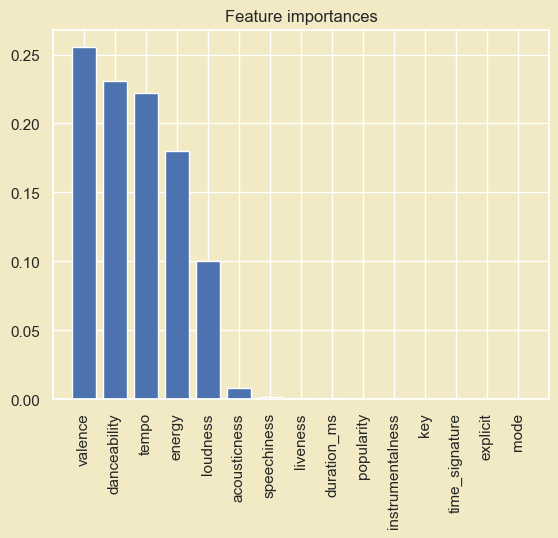

In [63]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)

# Train a Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=5,loss='log_loss', random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")

for i in range(X.shape[1]):
    print(f"{i + 1}. feature {indices[i]} ({importances[indices[i]]}) - {X.columns[indices[i]]}")

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [64]:
cols = ['valence' , 'danceability' , 'tempo' , 'energy' , 'loudness' , 'acousticness']

# Calculate max and min values for each column 
max_values = data[cols].max()
min_values = data[cols].min() 

# Print max and min values 
print("Maximum Values:") 
print(max_values) 
print("\nMinimum Values:") 
print(min_values) 

# Display all values for each column 
for col in cols: 
    print(f"\n All values for {col}:") 
    print(data[col].values)

Maximum Values:
valence           0.995
danceability      0.985
tempo           243.372
energy            1.000
loudness          4.532
acousticness      0.996
dtype: float64

Minimum Values:
valence          0.000
danceability     0.000
tempo            0.000
energy           0.000
loudness       -49.531
acousticness     0.000
dtype: float64

 All values for valence:
[0.715 0.267 0.12  ... 0.743 0.413 0.708]

 All values for danceability:
[0.676 0.42  0.438 ... 0.629 0.587 0.526]

 All values for tempo:
[ 87.917  77.489  76.332 ... 132.378 135.96   79.198]

 All values for energy:
[0.461 0.166 0.359 ... 0.329 0.506 0.487]

 All values for loudness:
[ -6.746 -17.235  -9.734 ... -10.895 -10.889 -10.204]

 All values for acousticness:
[0.0322 0.924  0.21   ... 0.867  0.381  0.681 ]


In [65]:
cols1 = ['speechiness', 'liveness' , 'duration_ms' , 'popularity' , 'instrumentalness' , 'key' , 'time_signature' , 'explicit', 'mode']

# Calculate max and min values for each column 
max_values = data[cols1].max()
min_values = data[cols1].min() 

# Print max and min values 
print("Maximum Values:") 
print(max_values) 
print("\nMinimum Values:") 
print(min_values) 

# Display all values for each column 
for col in cols1: 
    print(f"\n All values for {col}:") 
    print(data[col].values)

Maximum Values:
speechiness               0.965
liveness                  1.000
duration_ms         5237295.000
popularity              100.000
instrumentalness          1.000
key                      11.000
time_signature            5.000
explicit                  1.000
mode                      1.000
dtype: float64

Minimum Values:
speechiness            0.0
liveness               0.0
duration_ms         8586.0
popularity             0.0
instrumentalness       0.0
key                    0.0
time_signature         0.0
explicit               0.0
mode                   0.0
dtype: float64

 All values for speechiness:
[0.143  0.0763 0.0557 ... 0.042  0.0297 0.0725]

 All values for liveness:
[0.358  0.101  0.117  ... 0.0839 0.27   0.0893]

 All values for duration_ms:
[230666 149610 210826 ... 271466 283893 241826]

 All values for popularity:
[73 55 57 ... 22 41 22]

 All values for instrumentalness:
[1.01e-06 5.56e-06 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]

 All values for key:
[1 1 

In [66]:
import pickle
# pickling the model

with open('model.pkl','wb') as files:
    pickle.dump(final_model,files)

In [67]:
# loading the model,scaler and encoder
with open('model.pkl','rb') as files:
    final_model=pickle.load(files)

with open('std_scaler.pkl','rb') as f:
    scaled=pickle.load(f)

with open('lbl_encoder.pkl','rb') as file:
    encoder=pickle.load(file)

Pipeline

In [68]:
#read final csv file
df=pd.read_csv("spotify_categories.csv")
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,music_category,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Rock & Metal,2
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,World Music,6
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,World Music,6
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Pop,7
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Country & Folk,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,5,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Classical & Opera,8
113995,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,0,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Classical & Opera,8
113996,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,0,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Rock & Metal,2
113997,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,7,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Pop,7


In [69]:
df1 = df.drop(columns = ['track_id','artists','album_name','track_name','track_genre','cluster'], axis = 1)

In [70]:
df1

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,music_category
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,Rock & Metal
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,World Music
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,World Music
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,Pop
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,Country & Folk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,Classical & Opera
113995,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,Classical & Opera
113996,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,Rock & Metal
113997,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,Pop


In [71]:
df1.dtypes

popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
music_category       object
dtype: object

In [72]:
df1.to_csv('spotify_final.csv', index=False)

In [73]:
x_df=df1.drop(columns=["music_category"],axis=1)
y_df=df1["music_category"]

In [74]:
label_encoder = LabelEncoder()
encoder = label_encoder.fit_transform(y_df)

In [75]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,encoder,random_state=42)

In [76]:
# building pipeline for categorical and numerical data
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

num=x_df.select_dtypes(include=["int","float"]).columns.to_list()
#cat=y_df.select_dtypes(include=["object"]).columns.to_list()

#cat_preprocessor=Pipeline(steps=[("categorical",encoder)])
num_preprocessor=Pipeline(steps=[("numerical",scaler)])
print(num)
#print(cat)
#print(cat_preprocessor)
print(num_preprocessor)

['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
Pipeline(steps=[('numerical', StandardScaler())])


In [77]:
# compose preprocessing techniques
preprocessor=ColumnTransformer(transformers=[("numerical",num_preprocessor,num)])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('numerical',
                                                  StandardScaler())]),
                                 ['popularity', 'duration_ms', 'explicit',
                                  'danceability', 'energy', 'key', 'loudness',
                                  'mode', 'speechiness', 'acousticness',
                                  'instrumentalness', 'liveness', 'valence',
                                  'tempo', 'time_signature'])])

In [78]:
preprocessor.fit(x_df)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('numerical',
                                                  StandardScaler())]),
                                 ['popularity', 'duration_ms', 'explicit',
                                  'danceability', 'energy', 'key', 'loudness',
                                  'mode', 'speechiness', 'acousticness',
                                  'instrumentalness', 'liveness', 'valence',
                                  'tempo', 'time_signature'])])

In [79]:
#construct pipeline to combine preprocessor and model
pipeline=Pipeline(steps=[("preprocessing",preprocessor),
                   ("model",final_model)])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  ['popularity', 'duration_ms',
                                                   'explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('model',
                 GradientBoostingClassifier(max_depth=5, n_estimators=300))])

In [80]:
# fit with dataframe
pipeline.fit(x_df_train,y_df_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  ['popularity', 'duration_ms',
                                                   'explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('model',
                 GradientBoostingClassifier(max_depth=5, n_estimators=300))])

In [81]:
# evaluate the pipeline 
y_prediction=pipeline.predict(x_df_test)

y_prediction_proba_pipe = pipeline.predict_proba(x_df_test)

Accuracy_pipe = accuracy_score(y_df_test, y_prediction)

Precision_pipe = precision_score(y_df_test, y_prediction, average='weighted')

Recall_pipe = recall_score(y_df_test, y_prediction, average='weighted')

F1_Score_pipe = f1_score(y_df_test, y_prediction, average='weighted')

try:
    ROC_AUC_pipe = roc_auc_score(y_df_test, y_prediction_proba_pipe, multi_class='ovr', average='weighted')
except AttributeError:
    ROC_AUC_final = 'N/A'


# create dataframe to view above evaluation metrics
GBC_Pipe=pd.DataFrame({"model":"GradientBoostingClassifier","Accuracy":[Accuracy_pipe],"Precision":[Precision_pipe],"Recall":[Recall_pipe],"F1 Score":[F1_Score_pipe],"ROC_AUC":[ROC_AUC_pipe]})
GBC_Pipe

,model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,GradientBoostingClassifier,0.979158,0.979158,0.979158,0.979157,0.999809


Prediction

In [82]:
x_df.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [83]:
df1.loc[25]

popularity                       1
duration_ms                 302346
explicit                         0
danceability                 0.755
energy                       0.454
key                              9
loudness                    -9.609
mode                             0
speechiness                 0.0352
acousticness                 0.757
instrumentalness               0.0
liveness                     0.236
valence                       0.33
tempo                       120.06
time_signature                   4
music_category      Country & Folk
Name: 25, dtype: object

In [84]:
df1.loc[24]

popularity                        0
duration_ms                  231266
explicit                          0
danceability                  0.796
energy                        0.667
key                               5
loudness                     -4.831
mode                              0
speechiness                  0.0392
acousticness                  0.381
instrumentalness                0.0
liveness                      0.221
valence                       0.754
tempo                        97.988
time_signature                    4
music_category      Hip-Hop and R&B
Name: 24, dtype: object

In [85]:
df1.loc[50]

popularity                   46
duration_ms              213098
explicit                      0
danceability              0.596
energy                      0.2
key                           0
loudness                -10.424
mode                          0
speechiness              0.0305
acousticness               0.91
instrumentalness       0.000183
liveness                 0.0884
valence                   0.308
tempo                   107.893
time_signature                4
music_category      World Music
Name: 50, dtype: object

In [86]:
# New data to predict music genre
new_data=pd.DataFrame({
    'popularity': 1,
    'duration_ms': 302346,
    'explicit': 0,
    'danceability': 0.755,
    'energy': 0.454,
    'key': 9,
    'loudness': -9.609,
    'mode': 0,
    'speechiness': 0.0352,
    'acousticness': 0.757,
    'instrumentalness': 0.0,
    'liveness': 0.236,
    'valence': 0.33,
    'tempo': 120.06,
    'time_signature': 4
},index=[0])
new_data




,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1,302346,0,0.755,0.454,9,-9.609,0,0.0352,0.757,0.0,0.236,0.33,120.06,4


In [87]:
new_data1 = pd.DataFrame({
    'popularity': 46,
    'duration_ms': 213098,
    'explicit': 0,
    'danceability': 0.596,
    'energy': 0.2,
    'key': 0,
    'loudness': -10.424,
    'mode': 0,
    'speechiness': 0.0305,
    'acousticness': 0.91,
    'instrumentalness': 0.000183,
    'liveness': 0.0884,
    'valence': 0.308,
    'tempo': 107.893,
    'time_signature': 4
},index=[0])
new_data1




,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,46,213098,0,0.596,0.2,0,-10.424,0,0.0305,0.91,0.000183,0.0884,0.308,107.893,4


In [88]:
# FINAL MODEL PREDICTION 
prediction=pipeline.predict(new_data1)
# Convert numerical prediction back to original label 
decoded_prediction = label_encoder.inverse_transform(prediction) 
print(f"The genre of the song is: {decoded_prediction[0]}")


The genre of the song is: World Music


In [89]:
# save the pipeline in pickle

with open('pipeline.pkl','wb') as files:
    pickle.dump(pipeline,files)

In [90]:
with open('label_encoder.pkl', 'wb') as files: 
    pickle.dump(label_encoder, files)